# Parsing Dates in Python

We'll be working with three datasets: one containing information on earthquakes that occured between 1965 and 2016, and another that contains information on landslides that occured between 2007 and 2016 and last one that contains details of active volcanos of past 10000 years.

Find more details [here](https://www.kaggle.com/usgs/earthquake-database), [here](https://www.kaggle.com/nasa/landslide-events) and [here](https://www.kaggle.com/smithsonian/volcanic-eruptions#database.csv) 

In [2]:
#Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [4]:
# read in our data
earthquakes = pd.read_csv("C:\\Users\\ku.kulshrestha\\Documents\\Data-sources\\earthquake-database\\database.csv")
landslides = pd.read_csv("C:/Users/ku.kulshrestha/Documents/Data-sources/landslide-events/catalog.csv")
volcanos = pd.read_csv("C:/Users/ku.kulshrestha/Documents/Data-sources/volcanic-eruptions/database.csv")

# set seed for reproducibility
np.random.seed(0)

### Check the data type of our date column

For this part of the challenge, we will be working with the date column from the landslides dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [6]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Yep, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that the at the bottom of the output of head(), you can see that it says that the data type of this column is "object".

If you check the pandas dtype documentation, you'll notice that there's also a specific datetime64 dtypes. Because the dtype of our column is object rather than datetime64, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of your column without printing the first few rows if we like:

In [8]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [9]:
# Your turn! Check the data type of the Date column in the earthquakes dataframe
# (note the capital 'D' in date!)

## Convert our date columns to datetime¶

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can pandas what the format of our dates are with a guide called as "strftime directive". The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

In [10]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

Now when I check the first few rows of the new column, I can see that the dtype is datetime64. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day

In [11]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

### FAQs:

What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

            landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)


Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.


In [12]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to 
# double-check that the dtype is correct!)

## Select just the day of the month from our column

"This messing around with data types is fine, I guess, but what's the point?" To answer your question, let's try to get information on the day of the month that a landslide occured on from the original "date" column, which has an "object" dtype:

In [13]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values



We got an error! The important part to look at here is the part at the very end that says AttributeError: Can only use .dt accessor with datetimelike values. We're getting this error because the dt.day() function doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, because they haven't been parsed we can't interact with them in a useful way.

Luckily, we have a column that we parsed earlier , and that lets us get the day of the month out no problem:


In [15]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
print(day_of_month_landslides)

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
5       20.0
6       24.0
7       21.0
8       27.0
9       27.0
10      27.0
11       1.0
12       4.0
13       8.0
14      13.0
15      24.0
16       9.0
17      11.0
18      14.0
19      17.0
20      18.0
21      18.0
22      18.0
23      19.0
24      19.0
25      20.0
26      21.0
27      21.0
28      23.0
29       1.0
        ... 
1663    17.0
1664    10.0
1665    31.0
1666    31.0
1667    22.0
1668     9.0
1669    23.0
1670    21.0
1671    21.0
1672    12.0
1673    15.0
1674    24.0
1675    24.0
1676    15.0
1677    24.0
1678    21.0
1679    24.0
1680    28.0
1681    24.0
1682    27.0
1683    27.0
1684    14.0
1685    26.0
1686    27.0
1687    29.0
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64


In [16]:
# Your turn! get the day of the month from the date_parsed column

## Plot the day of the month to check the date parsing

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

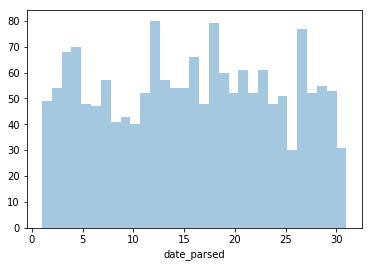

In [17]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

In [18]:
# Your turn! Plot the days of the month from your
# earthquake dataset and make sure they make sense